# Porto Seguro’s Safe Driver Prediction


<br><font color=blue>The aim of this compitation is to predict probability that a driver will intiate an auto insurance claim next year.A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers. </font>


**Steps**

1. [Read data set](#Read-data-set)
2. [Explore data set](#Explore-data-set)
3. [Co relation plot](#CORELATION-PLOT)
4. [Missing value is data set](#Missing-value-is-data-set)
5. [Convert variables into category type](#Convert-variables-into-category-type)
6. [Univariate analysis](#Univariate-analysis)
7. [Median and mean for categorical data](#Median-and-mean-for-categorical-data)
8. [Determine outliers in dataset](#Determine-outliers-in-dataset)
9. [One Hot Encoding](#One-Hot-Encoding)
10. [Split data set](#Split-data-set)
11. [Hyperparameter tuning](#Hyperparameter-tuning)
12. [Logistic Regression model](#Logistic-Regression-model)
13. [Model performance](#Model-performance)
14. [Reciever Operating Charactaristics](#Reciever-Operating-Charactaristics)
15. [Predict for unseen data set](#Predict-for-unseen-data-set)

# Import library

In [6]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import missingno as mssno
seed =45
% matplotlib inline

# Read data set

In [7]:
#path = '../input/'
path = ''
train = pd.read_csv(path+'train.csv',na_values=-1)
test = pd.read_csv(path+'test.csv',na_values=-1)
print('Number rows and columns:',train.shape)
print('Number rows and columns:',test.shape)

Number rows and columns: (595212, 59)
Number rows and columns: (892816, 58)


# Explore data set

In [8]:
train.head(3).T

,0,1,2
id,7.000000,9.000000,13.000000
target,0.000000,0.000000,0.000000
ps_ind_01,2.000000,1.000000,5.000000
ps_ind_02_cat,2.000000,1.000000,4.000000
ps_ind_03,5.000000,7.000000,9.000000
ps_ind_04_cat,1.000000,0.000000,1.000000
ps_ind_05_cat,0.000000,0.000000,0.000000
ps_ind_06_bin,0.000000,0.000000,0.000000
ps_ind_07_bin,1.000000,0.000000,0.000000
ps_ind_08_bin,0.000000,1.000000,1.000000


# Target varaiable

0    573518
1     21694
Name: target, dtype: int64

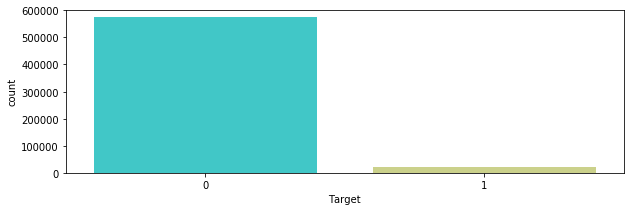

In [9]:
plt.figure(figsize=(10,3))
sns.countplot(train['target'],palette='rainbow')
plt.xlabel('Target')

train['target'].value_counts()

The 'target' variable in imbalanced 

## CORELATION PLOT

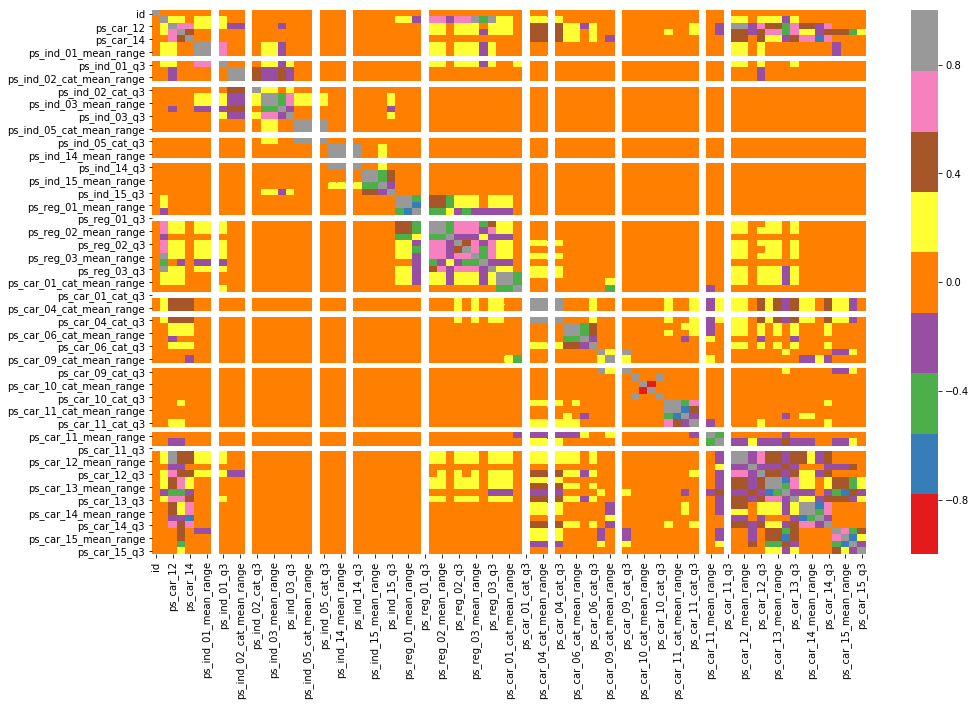

In [53]:
cor = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor,cmap='Set1')

#  ps calc  *  value as 0 relation with remaining varialble

In [11]:
ps_cal = train.columns[train.columns.str.startswith('ps_calc')] 
train = train.drop(ps_cal,axis =1)
test = test.drop(ps_cal,axis=1)
train.shape

(595212, 39)

# Missing value is data set

"""Values of -1 indicate that the feature was missing from the observation. 
The target columns signifies whether or not a claim was filed for that policy holder.""

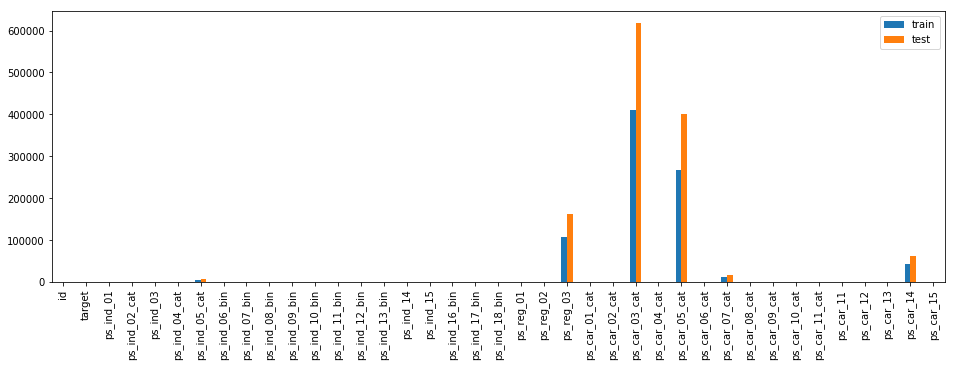

In [12]:
k= pd.DataFrame()
k['train']= train.isnull().sum()
k['test'] = test.isnull().sum()
fig,ax = plt.subplots(figsize=(16,5))
k.plot(kind='bar',ax=ax)

Missing value in test train data set are in same propotion and same column

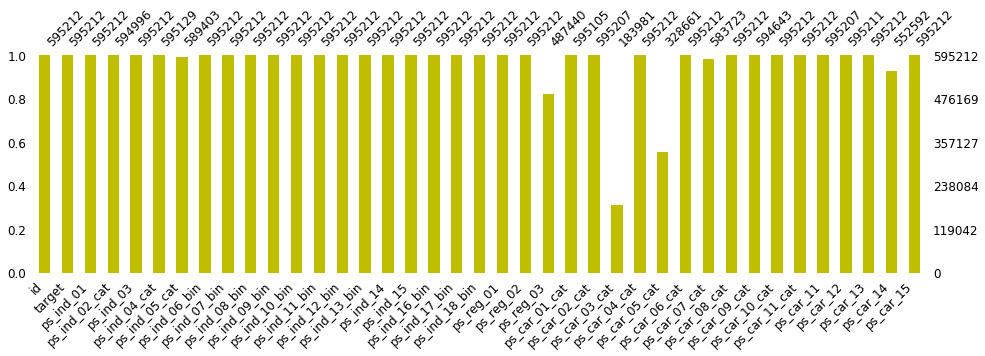

In [13]:
mssno.bar(train,color='y',figsize=(16,4),fontsize=12)

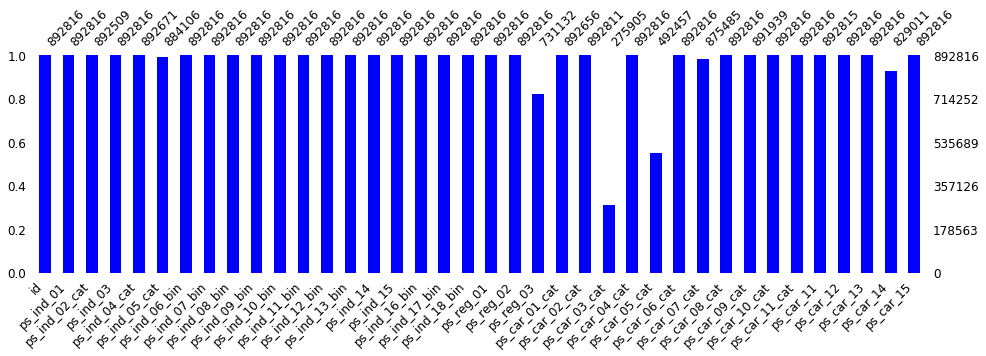

In [14]:
mssno.bar(test,color='b',figsize=(16,4),fontsize=12)

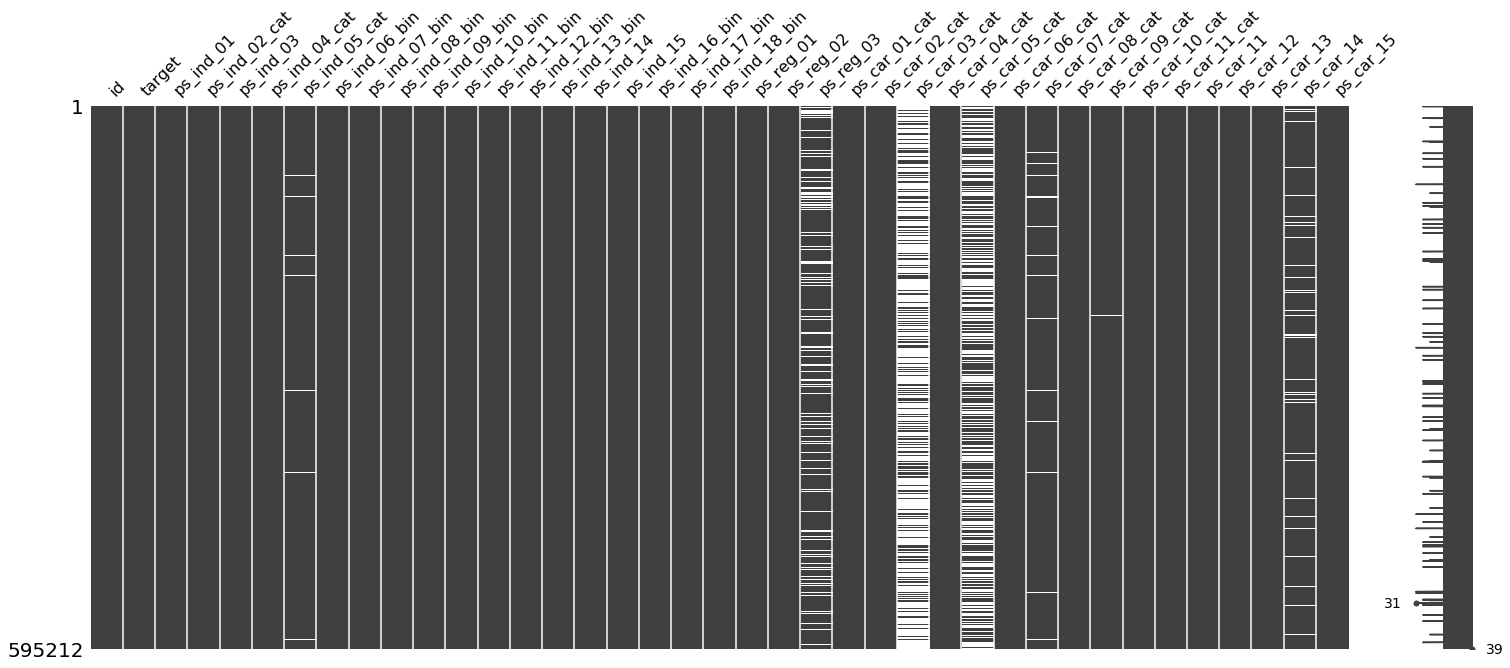

In [15]:
mssno.matrix(train)

In [16]:
def missing_value(df):
    col = df.columns
    for i in col:
        if df[i].isnull().sum()>0:
            df[i].fillna(df[i].mode()[0],inplace=True)

In [17]:
missing_value(train)
missing_value(test)

# Convert variables into category type

In [18]:
def basic_details(df):
    b = pd.DataFrame()
    #b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(train)

,N unique value,dtype
id,595212,int64
target,2,int64
ps_ind_01,8,int64
ps_ind_02_cat,4,float64
ps_ind_03,12,int64
ps_ind_04_cat,2,float64
ps_ind_05_cat,7,float64
ps_ind_06_bin,2,int64
ps_ind_07_bin,2,int64
ps_ind_08_bin,2,int64


###### The unique value of "ps_car_11_cat" is maximum in the data set is 104

In [19]:
def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=104:
            df[i] = df[i].astype('category')
category_type(train)
category_type(test)

# Univariate analysis

In [20]:
cat_col = [col for col in train.columns if '_cat' in col]
print(cat_col)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


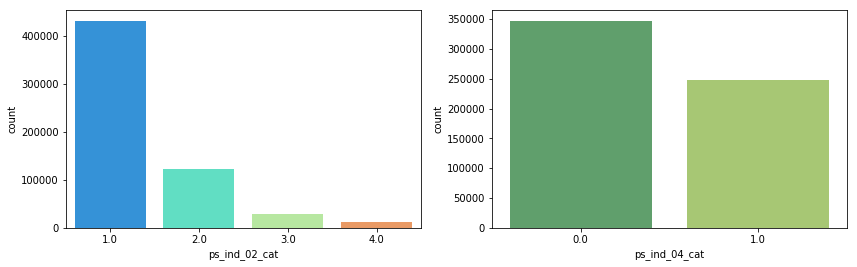

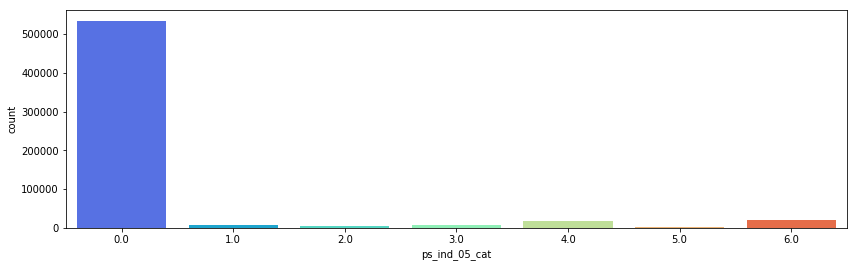

In [21]:
fig ,ax = plt.subplots(1,2,figsize=(14,4))
ax1,ax2, = ax.flatten()
sns.countplot(train['ps_ind_02_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_ind_04_cat'],palette='summer',ax=ax2)
fig,ax = plt.subplots(figsize=(14,4))
sns.countplot(train['ps_ind_05_cat'],palette='rainbow',ax=ax)

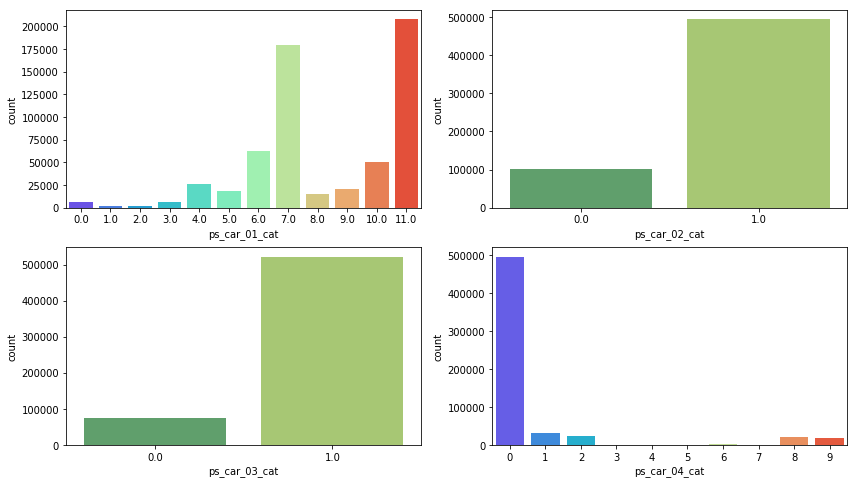

In [22]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(train['ps_car_01_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_car_02_cat'],palette='summer',ax=ax2)
sns.countplot(train['ps_car_03_cat'],palette='summer',ax=ax3)
sns.countplot(train['ps_car_04_cat'],palette='rainbow',ax=ax4)

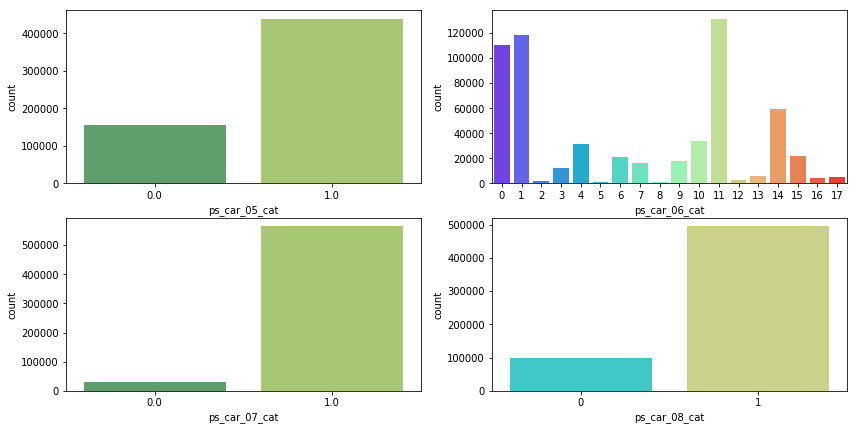

In [23]:
fig,ax = plt.subplots(2,2,figsize = (14,7))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(train['ps_car_05_cat'],palette='summer',ax=ax1)
sns.countplot(train['ps_car_06_cat'],palette='rainbow',ax=ax2)
sns.countplot(train['ps_car_07_cat'],palette='summer',ax=ax3)
sns.countplot(train['ps_car_08_cat'],palette='rainbow',ax=ax4)


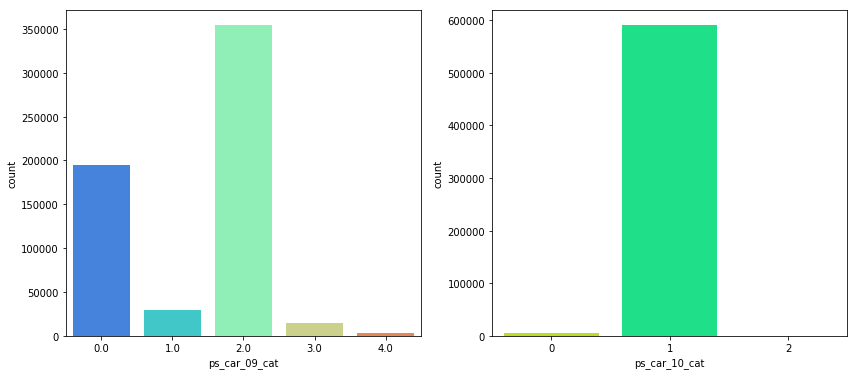

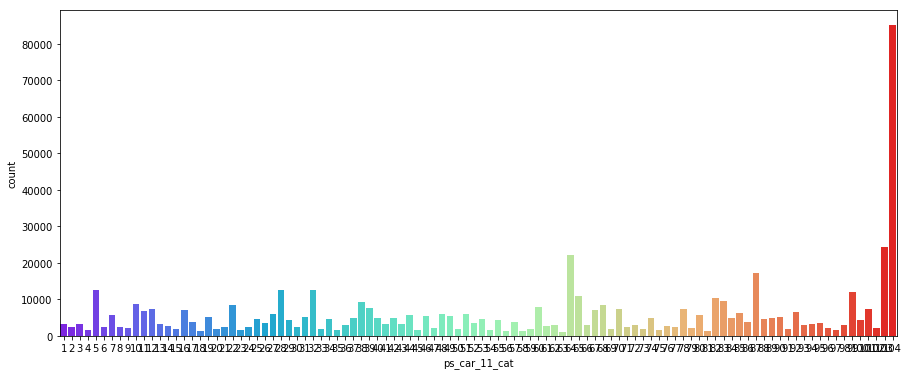

In [24]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.countplot(train['ps_car_09_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_car_10_cat'],palette='gist_rainbow',ax=ax2)
fig,ax = plt.subplots(figsize=(15,6))
sns.countplot(train['ps_car_11_cat'],palette='rainbow',ax=ax)

In [25]:
bin_col = [col for col in train.columns if 'bin' in col]
print(bin_col)

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']


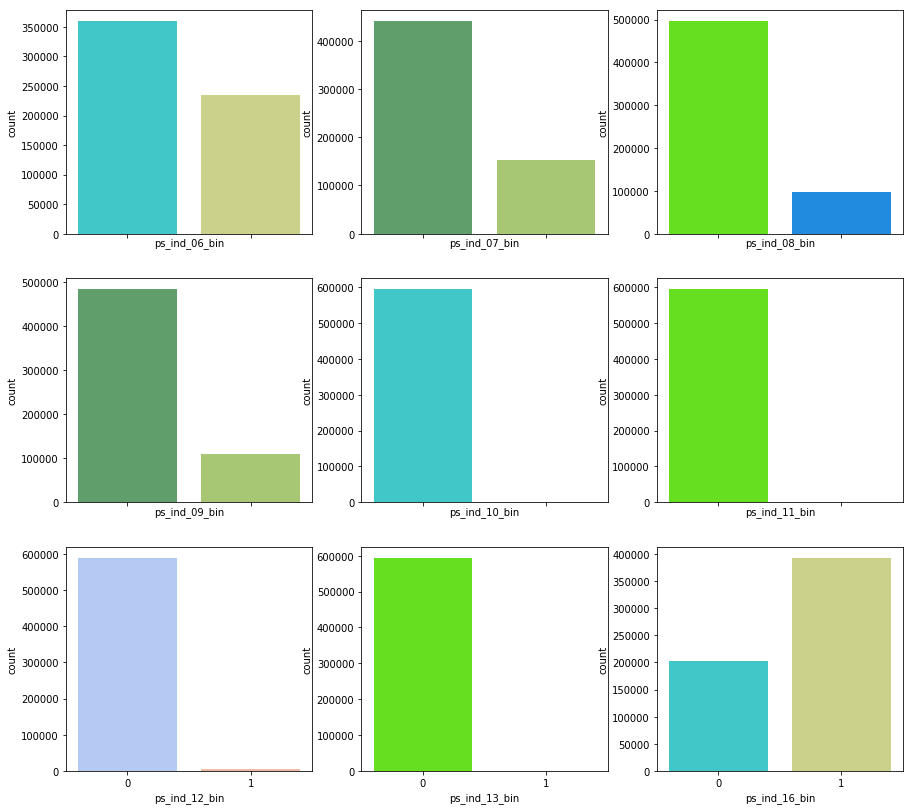

In [26]:
fig,ax = plt.subplots(3,3,figsize=(15,14),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9 = ax.flatten()
sns.countplot(train['ps_ind_06_bin'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_ind_07_bin'],palette='summer',ax=ax2)
sns.countplot(train['ps_ind_08_bin'],palette='gist_rainbow',ax=ax3)
sns.countplot(train['ps_ind_09_bin'],palette='summer',ax=ax4)
sns.countplot(train['ps_ind_10_bin'],palette='rainbow',ax=ax5)
sns.countplot(train['ps_ind_11_bin'],palette='gist_rainbow',ax=ax6)
sns.countplot(train['ps_ind_12_bin'],palette='coolwarm',ax=ax7)
sns.countplot(train['ps_ind_13_bin'],palette='gist_rainbow',ax=ax8)
sns.countplot(train['ps_ind_16_bin'],palette='rainbow',ax=ax9)

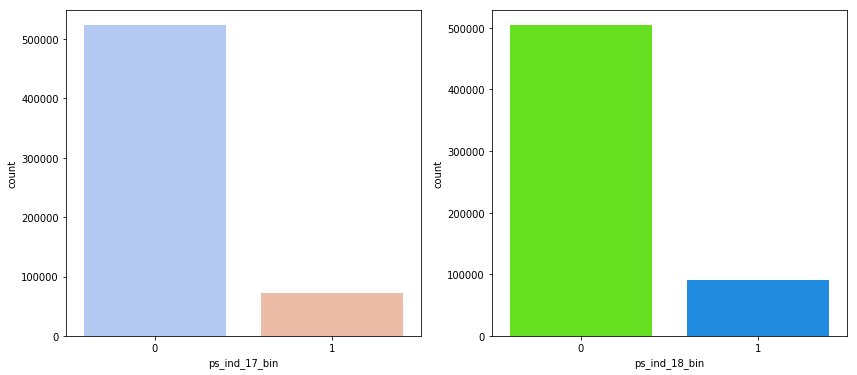

In [27]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.countplot(train['ps_ind_17_bin'],palette='coolwarm',ax=ax1)
sns.countplot(train['ps_ind_18_bin'],palette='gist_rainbow',ax=ax2)

In [28]:
tot_cat_col = list(train.select_dtypes(include=['category']).columns)

other_cat_col = [c for c in tot_cat_col if c not in cat_col+ bin_col]
other_cat_col

['target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_car_11',
 'ps_car_15']

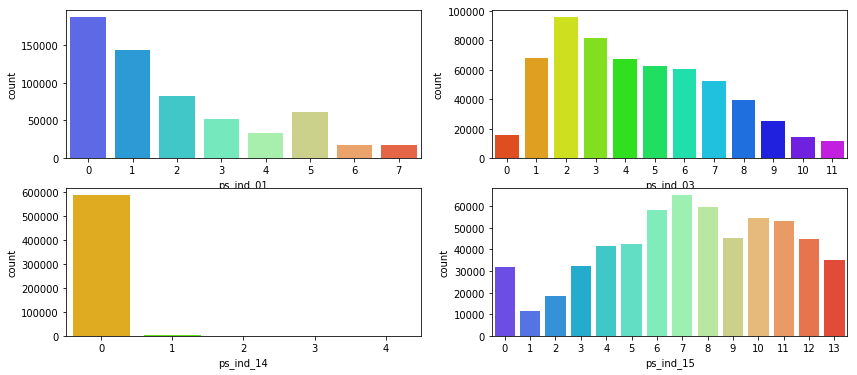

In [29]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=train,x='ps_ind_01',palette='rainbow',ax=ax1)
sns.countplot(data=train,x='ps_ind_03',palette='gist_rainbow',ax=ax2)
sns.countplot(data=train,x='ps_ind_14',palette='gist_rainbow',ax=ax3)
sns.countplot(data=train,x='ps_ind_15',palette='rainbow',ax=ax4)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

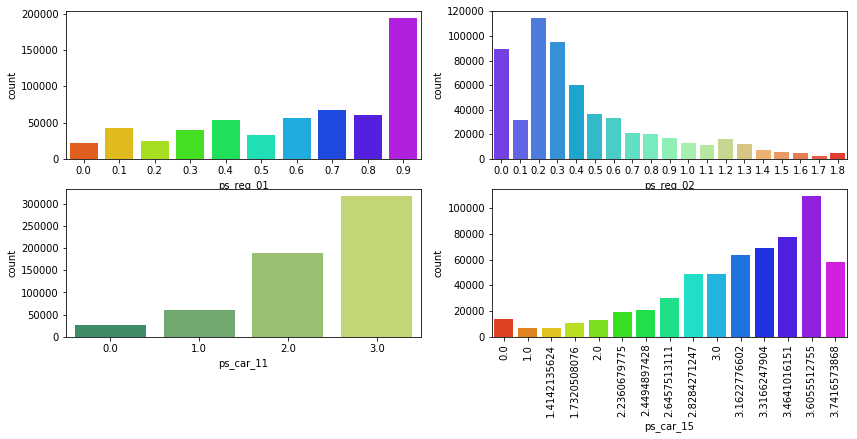

In [30]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 =ax.flatten()
sns.countplot(data=train,x='ps_reg_01',palette='gist_rainbow',ax=ax1)
sns.countplot(data=train,x='ps_reg_02',palette='rainbow',ax=ax2)
sns.countplot(data=train,x='ps_car_11',palette='summer',ax=ax3)
sns.countplot(data=train,x='ps_car_15',palette='gist_rainbow',ax=ax4)
plt.xticks(rotation=90)

In [31]:
num_col = [c for c in train.columns if c not in tot_cat_col]
num_col.remove('id')
num_col

['ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14']

In [32]:
train['ps_reg_03'].describe()

count    595212.000000
mean          0.846950
std           0.328237
min           0.061237
25%           0.633936
50%           0.720677
75%           1.000000
max           4.037945
Name: ps_reg_03, dtype: float64

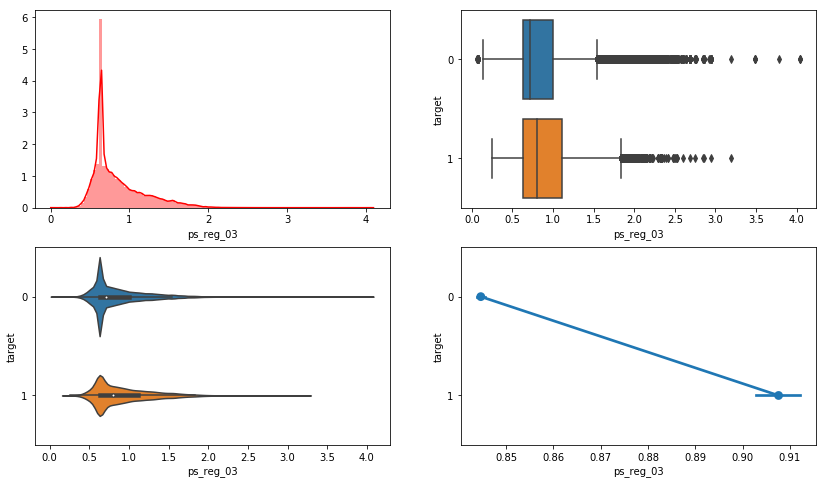

In [33]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_reg_03'],bins=100,color='red',ax=ax1)
sns.boxplot(x ='ps_reg_03',y='target',data=train,ax=ax2)
sns.violinplot(x ='ps_reg_03',y='target',data=train,ax=ax3)
sns.pointplot(x= 'ps_reg_03',y='target',data=train,ax=ax4)

ps_reg_03 has outlier data points

In [34]:
train['ps_car_12'].describe()

count    595212.000000
mean          0.379947
std           0.058300
min           0.100000
25%           0.316228
50%           0.374166
75%           0.400000
max           1.264911
Name: ps_car_12, dtype: float64

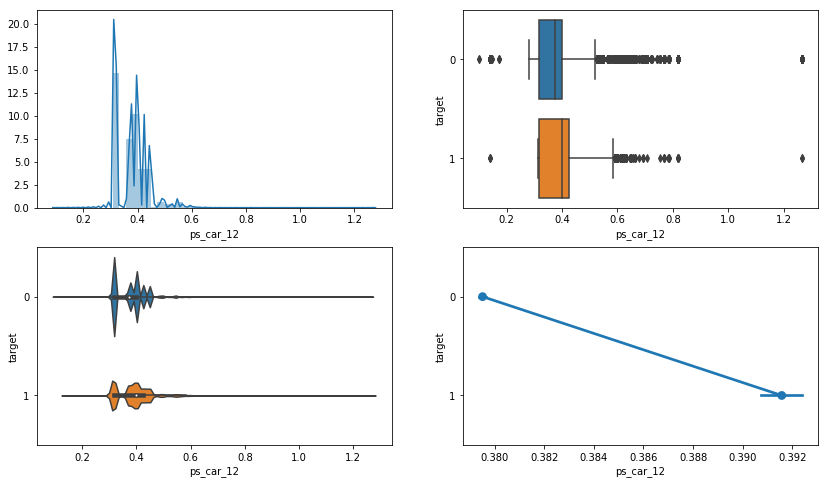

In [35]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_12'],bins=50,ax=ax1)
sns.boxplot(x='ps_car_12',y='target',data=train,ax=ax2)
sns.violinplot(x='ps_car_12',y='target',data=train,ax=ax3)
sns.pointplot(x='ps_car_12',y='target',data=train,ax=ax4)

In [36]:
train['ps_car_13'].describe()

count    595212.000000
mean          0.813265
std           0.224588
min           0.250619
25%           0.670867
50%           0.765811
75%           0.906190
max           3.720626
Name: ps_car_13, dtype: float64

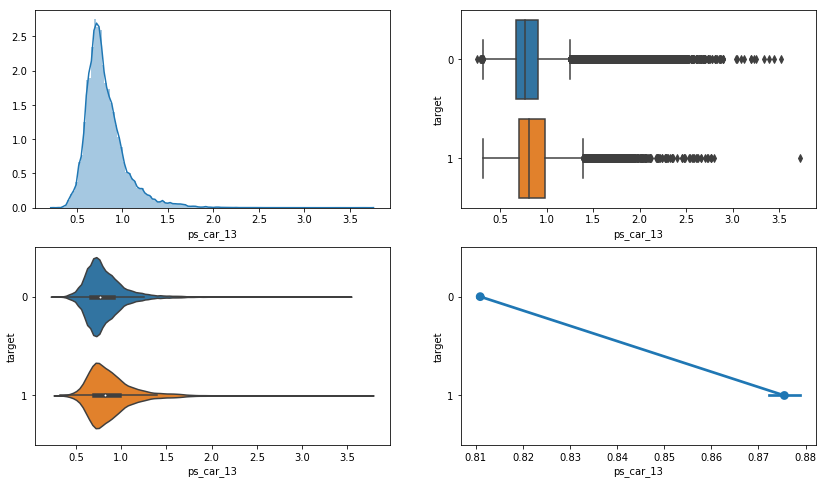

In [37]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_13'],bins=120,ax=ax1)
sns.boxplot(x='ps_car_13',y='target',data=train,ax=ax2)
sns.violinplot(x='ps_car_13',y='target',data=train,ax=ax3)
sns.pointplot(x='ps_car_13',y='target',data=train,ax=ax4)

In [38]:
train['ps_car_14'].describe()

count    595212.000000
mean          0.373748
std           0.044078
min           0.109545
25%           0.353553
50%           0.368782
75%           0.396485
max           0.636396
Name: ps_car_14, dtype: float64

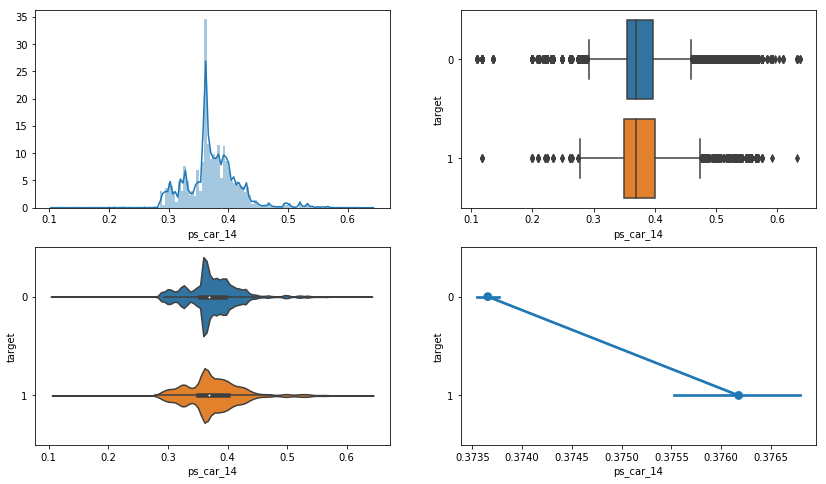

In [39]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_14'],bins=120,ax=ax1)
sns.boxplot(x='ps_car_14',y='target',data=train,ax=ax2)
sns.violinplot(x='ps_car_14',y='target',data=train,ax=ax3)
sns.pointplot(x='ps_car_14',y='target',data=train,ax=ax4)

## Median and mean for categorical data

In [40]:
def transform_df(df):
    df = pd.DataFrame(df)
    dcol= [c for c in train.columns if train[c].nunique()>2]
    dcol.remove('id')   
    d_median = df[dcol].median(axis=0)
    d_mean = df[dcol].mean(axis=0)
    q1 = df[dcol].apply(np.float32).quantile(0.25)
    q3 = df[dcol].apply(np.float32).quantile(0.75)
    
    #Add mean and median column to data set having more then 2 categories
    for c in dcol:
        df[c+str('_median_range')] = (df[c].astype(np.float32).values > d_median[c]).astype(np.int8)
        df[c+str('_mean_range')] = (df[c].astype(np.float32).values > d_mean[c]).astype(np.int8)
        df[c+str('_q1')] = (df[c].astype(np.float32).values < q1[c]).astype(np.int8)
        df[c+str('_q3')] = (df[c].astype(np.float32).values > q3[c]).astype(np.int8)
    return df

In [41]:
train = transform_df(train)
test = transform_df(test)

# Co relation plot

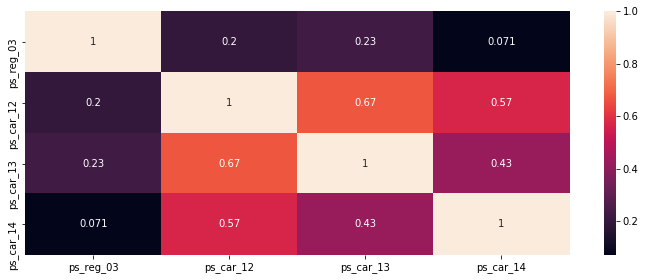

In [42]:
cor = train[num_col].corr()
plt.figure(figsize=(10,4))
sns.heatmap(cor,annot=True)
plt.tight_layout()

# Determine outliers in dataset

In [43]:
def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
        
outlier(train,num_col)
outlier(test,num_col) 

ps_reg_03 0.08484029175000007 1.54909582495 0.4183300133000001 1.8521946442


/home/sk/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ps_car_12 0.19056941500000002 0.525658351 0.3155946768 0.5656854249000001
ps_car_13 0.31788087655 1.2591761161500001 0.44830050977400004 1.6176168955090011
ps_car_14 0.2891566484999999 0.4608812941000002 0.2887905816 0.5234500931
ps_reg_03 0.08156262285000004 1.55455860645 0.41907636539999993 1.8521946442
ps_car_12 0.19056941500000002 0.525658351 0.3155946768 0.5656854249000001
ps_car_13 0.3188870638624999 1.2584782365625 0.4485283558 1.6172399231399996
ps_car_14 0.2891566484999999 0.4608812941000002 0.2887905816 0.5234500931


# One Hot Encoding

In [44]:
def OHE(df1,df2,column):
    cat_col = column
    #cat_col = df.select_dtypes(include =['category']).columns
    len_df1 = df1.shape[0]
    
    df = pd.concat([df1,df2],ignore_index=True)
    c2,c3 = [],{}
    
    print('Categorical feature',len(column))
    for c in cat_col:
        if df[c].nunique()>2 :
            c2.append(c)
            c3[c] = 'ohe_'+c
    
    df = pd.get_dummies(df, prefix=c3, columns=c2,drop_first=True)

    df1 = df.loc[:len_df1-1]
    df2 = df.loc[len_df1:]
    print('Train',df1.shape)
    print('Test',df2.shape)
    return df1,df2

In [45]:
train1,test1 = OHE(train,test,tot_cat_col)

Categorical feature 34
Train (595212, 337)
Test (892816, 337)


# Split data set

In [46]:
X = train1.drop(['target','id'],axis=1)
y = train1['target'].astype('category')
x_test = test1.drop(['target','id'],axis=1)
del train1,test1

# Hyperparameter tuning 

In [47]:
#Grid search
"""logreg = LogisticRegression(class_weight='balanced')
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=3)
clf.fit(X,y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C'])) """

"logreg = LogisticRegression(class_weight='balanced')\nparam = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1]}\nclf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=3)\nclf.fit(X,y)\nprint('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C'])) "

# Logistic Regression model
Logistic regression is used for modelling. The data set is split using Stratified Kfold. In each split model is created and predicted using that model. The final predicted value is average of all model. 

In [48]:
kf = StratifiedKFold(n_splits=5,random_state=seed,shuffle=True)
pred_test_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    lr = LogisticRegression(class_weight='balanced',C=0.003)
    lr.fit(xtr, ytr)
    pred_test = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_test)
    print('roc_auc_score',score)
    cv_score.append(score)
    pred_test_full += lr.predict_proba(x_test)[:,1]
    i+=1


1 of kfold 5
roc_auc_score 0.6340262931057901

2 of kfold 5
roc_auc_score 0.6339489755464578

3 of kfold 5
roc_auc_score 0.63776417646514

4 of kfold 5
roc_auc_score 0.6380622121421083

5 of kfold 5
roc_auc_score 0.634043158194346


# Model performance

In [49]:
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Confusion matrix
 [[71220 43483]
 [ 1862  2476]]
Cv [0.6340262931057901, 0.6339489755464578, 0.63776417646514, 0.6380622121421083, 0.634043158194346] 
Mean cv Score 0.6355689630907685


# Reciever Operating Charactaristics

Text(0.5,0,'False positive rate')

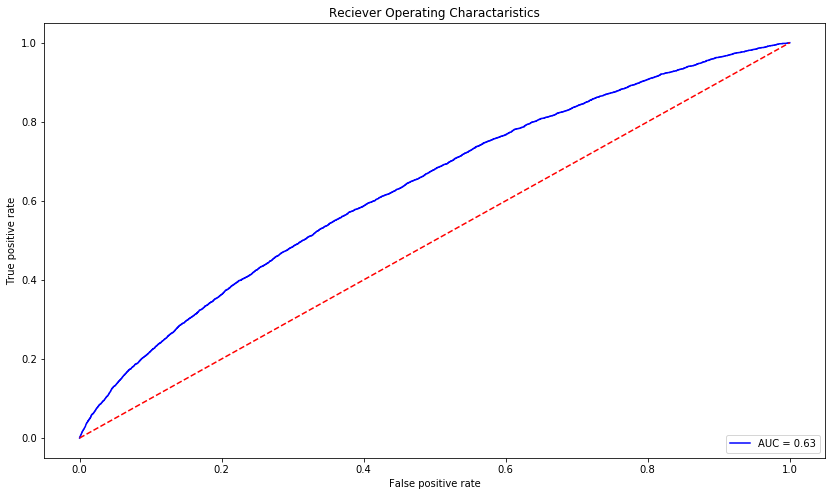

In [50]:
proba = lr.predict_proba(xvl)[:,1]
fpr,tpr, threshold = roc_curve(yvl,proba)
auc_val = auc(fpr,tpr)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Charactaristics')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % auc_val)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

# Predict for unseen data set

In [51]:
y_pred = pred_test_full/5
submit = pd.DataFrame({'id':test['id'],'target':y_pred})
#submit.to_csv('lr_porto.csv.gz',index=False,compression='gzip') 
submit.to_csv('lr_porto.csv',index=False) 

In [52]:
submit.head()

,id,target
0,0,0.422747
1,1,0.470661
2,2,0.383311
3,3,0.301954
4,4,0.495275


# Thank you for visiting